# Describe:
Within the repository, create a jupyter notebook that uses descriptive statistics and plots to describe the Boston House Prices dataset.

This notebook contains an analysis of the Boston Housing Dataset from the scikit learn (http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) library which originates from the StatLib library.

The dataset was collected in the 1970's and created by Harrison, D. and Rubinfeld, D.L. The dataset is typically utilised in papers for addressing regression problems in a dataset. This information is also included in the description given within the dataset from the scikit learn library. 

The analysis itself will include the use of descriptive statistics, inferential statistics and a prediction using neural networks using keras.

In [1]:
# Importing libraries
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston

In [11]:
# Plot figure size settings
pl.rcParams['figure.figsize'] = [10.0, 5.0]

In [6]:
# Set variable for loading dataset
boston = load_boston()

The Boston House Prices dataset contains 506 rows of data and 13 variable columns containing information to be analysed. To ensure that the dataset has loaded correctly we can check the shape of the dataset by printing the below -

In [15]:
# Converts the dataset in to a pandas dataframe
bostondf_data = pd.DataFrame(boston.data)

In [18]:
# Visualising dataset loaded correctly
#print(boston.data.shape)

#Prints the number of features measured & tests contained in the datset
hFeatures = bostondf_data.shape[1]
hRecords = bostondf_data.shape[0]

print("The Number of Housing Features Recorded in the Dataset: ", hFeatures)
print("The Number of Recorded Tests", hRecords)

The Number of Housing Features Recorded in the Dataset:  13
The Number of Recorded Tests 506


In [28]:
# Separate out the attributes listed in the dataset and stores them in a separate variable
attributes = boston.feature_names 
print(attributes)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [29]:
# Checks the number of null values there are for each of the attributes contained in the dataset 
bostondf_data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

However, as we can see from the print above the function is using the index for the columns in the dataset rather than using the attributes listed in the column headers. Therefore, we must add to the analysis to include the attributes for clarity.

In [30]:
# Creates a new pandas dataframe which inclues the attributes header
bostondf = pd.DataFrame(boston.data, columns = attributes)

In [31]:
# Re-run of the is null check on the new dataframe to include the attributes header
bostondf.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

The below cell prints the .head() function to allow for a quick review of the dataset attributes and the first  few lines of data from the set to ensure it is loading correctly.

In [32]:
bostondf.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

The details contained within the dataset are outlined in the information below - 

In [10]:
#Describes the details contained in the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

When reviewing the above description of the dataset it should be noted that the attribute which we require for the inferential statistics steps later is not included as part of the .head() print outs, as this is a 14th column to the dataset. Therefore, it must be included manually below.

In [33]:
# The 'MEDV' column is typically known as the target of the dataset which is also outlined in the description, therefore the T in the new dataframe variable will refer to this.
bostondfT = pd.DataFrame(boston.target, columns =['MEDV']) #Median value of homes
#Concates both the original dataframe and target information into a single dataframe 
df_boston = pd.concat([bostondf, bostondfT], axis = 1)

We can  now use the .head() and isnull functions to re-test the new dataframe to ensure it is now including the additional Median House Value attribute

In [34]:
df_boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [35]:
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

An additional description function can be run to give the following data relating to each of the columns contained within the Boston House Price dataset  such as: 
- Count
- Mean
- Standard Deviation
- Minimum Value
- Maximum Value
- Percentile Values

In [36]:
df_boston.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

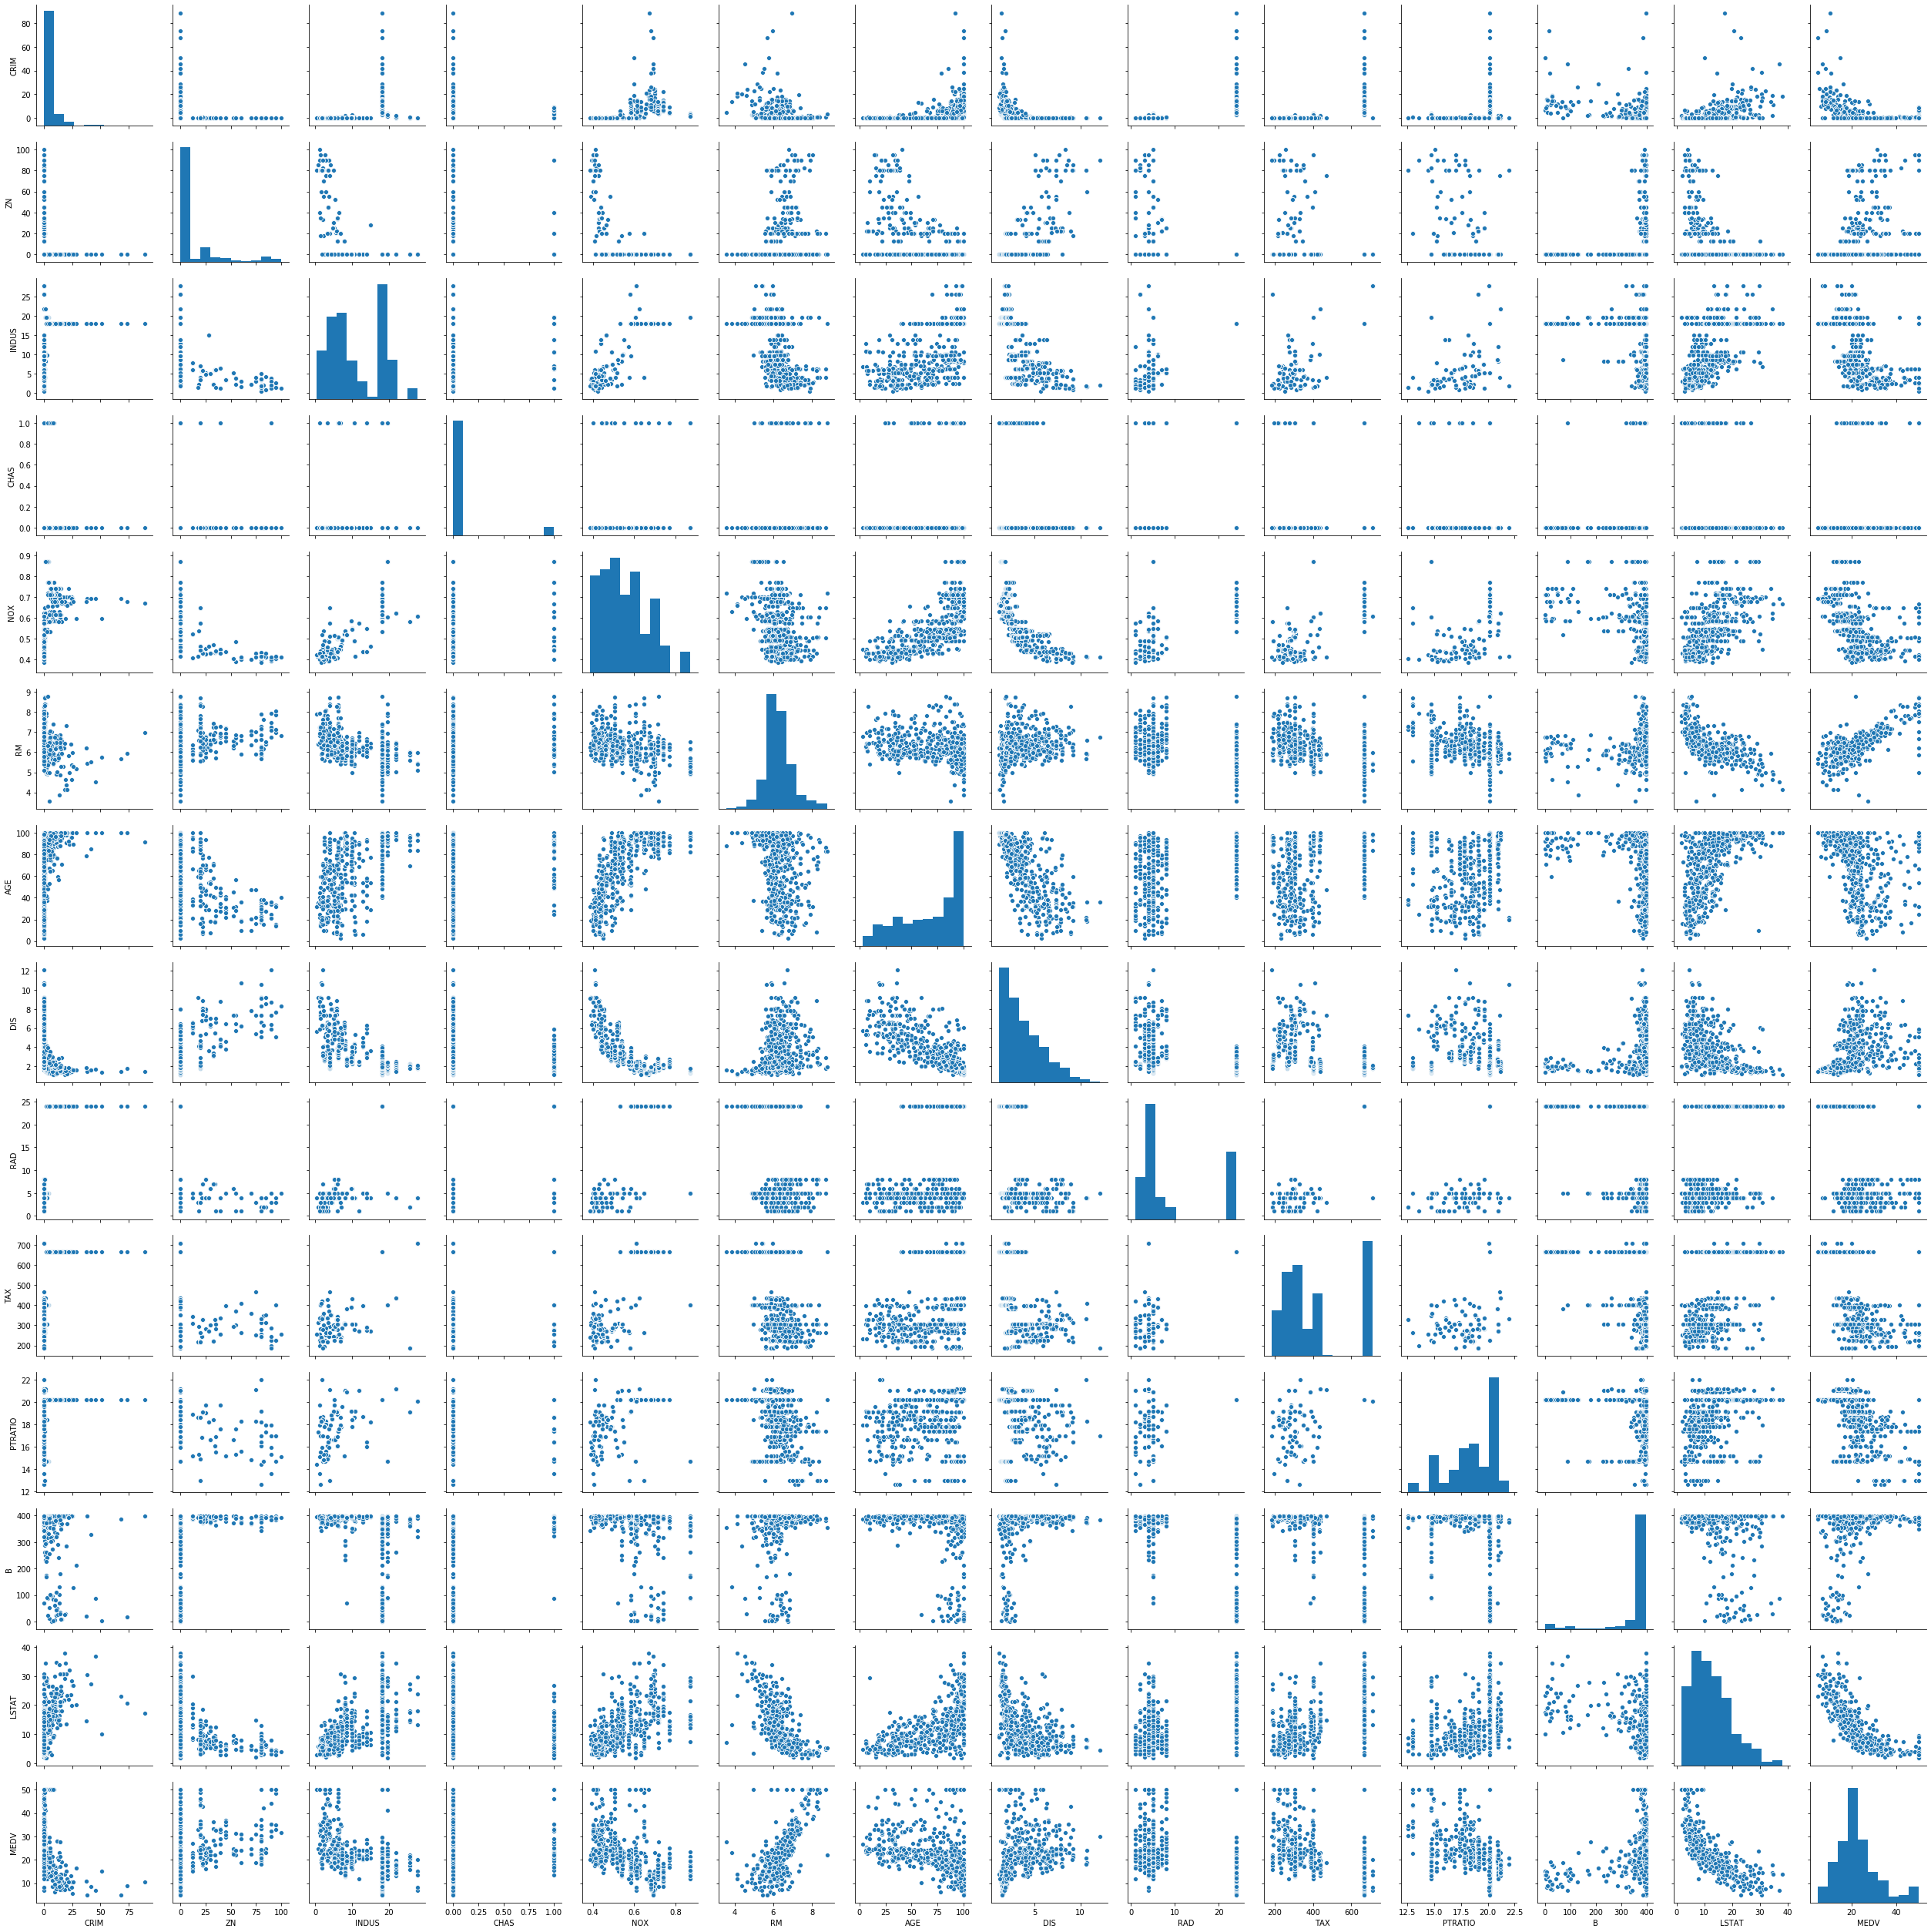

In [38]:
# Pairplot of overall data in the dataframe
sns.pairplot(df_boston)

The correlation coefficient can also be examined across the attributes in this dataset. This is useful when trying to obtain an overall view or description of the dataset as it examines the strength of the relationship between the two variables being examined. As the dataset is typically used to examine regression the correlation coefficient is a useful tool to determine why this dataset is used for regression problems.

In [39]:
df_boston.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
MEDV    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
MEDV     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

However, the above table makes it quite difficult to pick out where relationships may be visible between the variables and therefore a heatmap can provide a clearer view of this information as can be seen below -

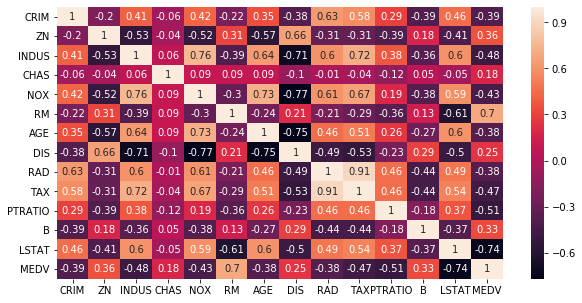

In [40]:
correlation_matrix = df_boston.corr().round(2) # Rounds the correlation coefficient values calculated above to 2 decimal places and stores them in a variable
sns.heatmap(data=correlation_matrix, annot=True) # annot is added to the heatmap so the values of the calculation are visible within the heatmap

The correlation coefficient calculated values are indicative of either:
- Values closer to 1 indicate a strong positive or linear relationship between the variables
- Values closer to -1 indicate a strong negative relationship between the variables
- Values closer to 0, either negative or positive, indicate no correlation between the variables

From reviewing the above heatmap the attributes with the closest linear relationship is the RAD attribute (index of accessibility to radial highways) and the TAX attribute (full-value property-tax rate per $10,000) at 0.91.  While the NOX (nitric oxides concentration (parts per 10 million) and DIS (weighted distances to five Boston employment centres)attributes have the most non-linear relationship between the variables examined in the dataset.

# Infer: 
Add a section where you use inferential
statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t. You should explain and discuss your findings within the notebook. 

In [43]:
#Examining the correlation coefficient between median house value and Charles river varaible
#https://statisticsbyjim.com/basics/correlations/

np.corrcoef(df_boston.MEDV, df_boston.CHAS)

array([[1.        , 0.17526018],
       [0.17526018, 1.        ]])

The correlation coefficient calculation for the median house price and charles river variables indicates a closer to 0 relationship than a linear relationship for the variables as it equates to 0.17.

This is also confirmed when examining the scatter plot below -

In [44]:
setCols = ['CHAS', 'MEDV']

Text(0, 0.5, 'House prices ($10,000 values)')

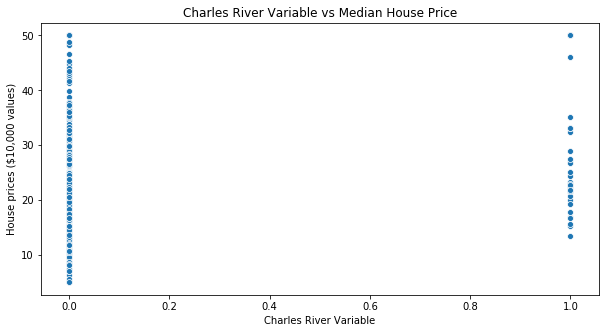

In [47]:
# Scatter plot of median house prices v Charles River Variable
pl.title("Charles River Variable vs Median House Price")
sns.scatterplot(df_boston.CHAS, df_boston.MEDV)
pl.xlabel("Charles River Variable")
pl.ylabel("House prices ($10,000 values)")


From the above scatter plot the median prices seem to vary across the range independent of the Chaarles River variable

# Predict: 
Use keras to create a neural network that can predict the median house price based on the other variables in the dataset.
You are free to interpret this as you wish — for example, you may use all the other variables, or select a subset.